In [21]:
library("e1071")
library("ROCR")
library("ISLR")


Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1





Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 0.1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




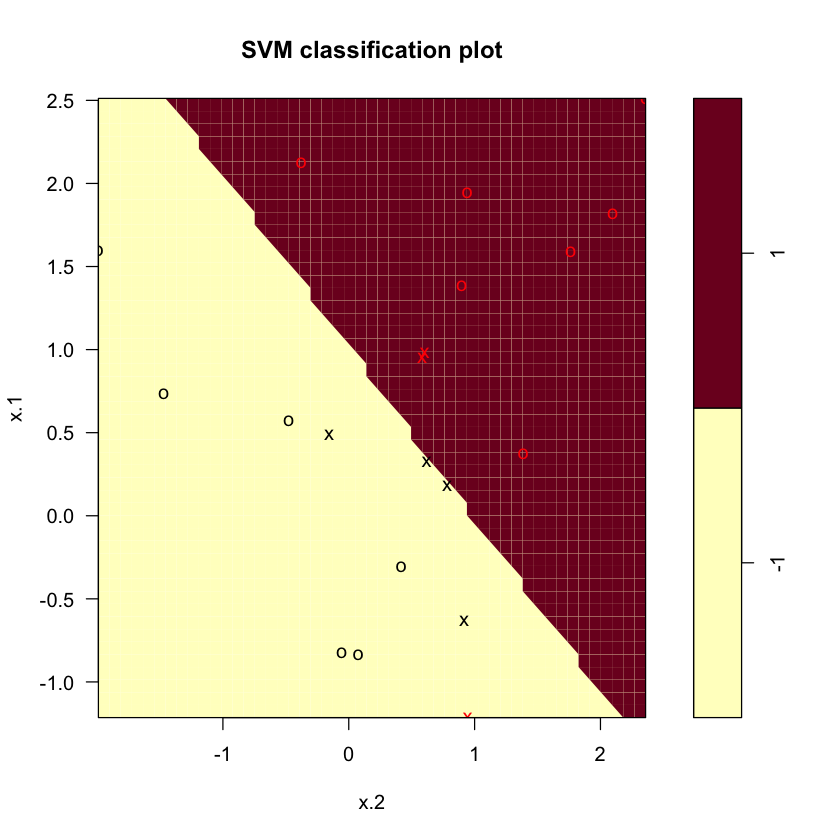

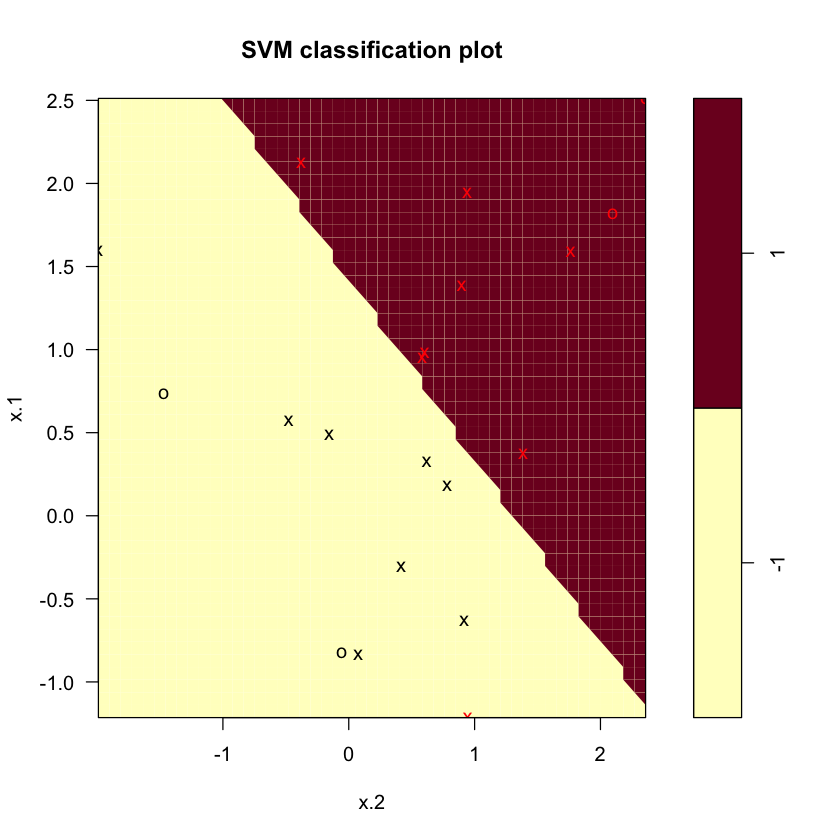

In [2]:
# Support Vector Classifier (Linear kernel)
## Two-dimensional example
set.seed(1)
x = matrix(rnorm(20 * 2), ncol = 2)   # Feature vectors: 20 * 2
y = c(rep(-1, 10), rep(1, 10))        # Response vector: 20 * 1 
x[y == 1, ] = x[y == 1, ] + 1
data = data.frame(x = x, y = as.factor(y))

## Cost of constraints violation: 
## Small value: Wide margin; Many support vectors 
## Large value: Narrow margin; Few support vectors 
svc_large_c = svm(y ~., data = data, kernel = "linear", cost = 10, scale = FALSE)  
summary(svc_large_c)
svc_small_c = svm(y ~., data = data, kernel = "linear", cost = 0.1, scale = FALSE)
summary(svc_small_c)

## Cross: Support vectors
## Circle: Remaining observations  
plot(svc_large_c, data)
plot(svc_small_c, data)

In [3]:
# Cross validation
## Arg method: The function to be tuned; The character string naming such a function
## Arg ranges: The named list of parameter vectors spanning the sampling space
set.seed(1)
params = tune(svm, y ~., data = data, kernel = "linear", ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
summary(params)               # Detailed cross-validation errors  
summary(params$best.model)    # Optimal model obtained 


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.05 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.55  0.4377975
2 1e-02  0.55  0.4377975
3 1e-01  0.05  0.1581139
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229



Call:
best.tune(method = svm, train.x = y ~ ., data = data, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [4]:
# Prediction
x_validation = matrix(rnorm(20 * 2), ncol = 2)
y_validation = sample(c(-1, 1), 20, rep = TRUE)
x_validation[y_validation == 1, ] = x_validation[y_validation == 1, ] + 1
data_validation = data.frame(x = x_validation, y = as.factor(y_validation))

model = params$best.model
y_pred = predict(model, data_validation)
table(prediction = y_pred, truth = data_validation$y)

          truth
prediction -1 1
        -1  9 1
        1   2 8


Call:
svm(formula = y ~ ., data = data[ind, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2





Call:
svm(formula = y ~ ., data = data[ind, ], kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 

Number of Support Vectors:  16

 ( 7 9 )


Number of Classes:  2 

Levels: 
 1 2




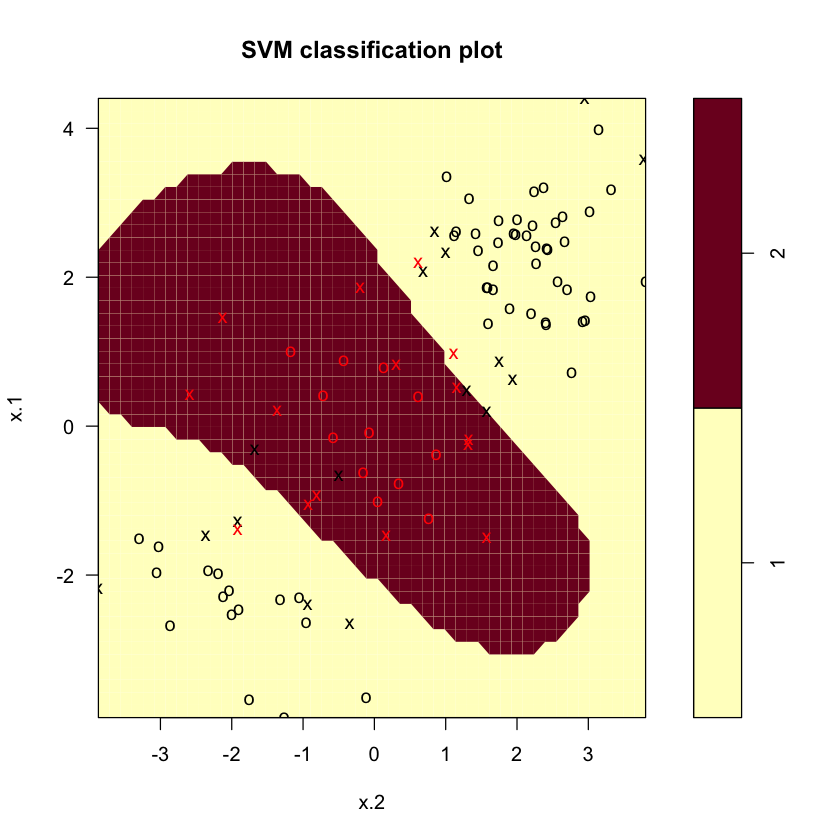

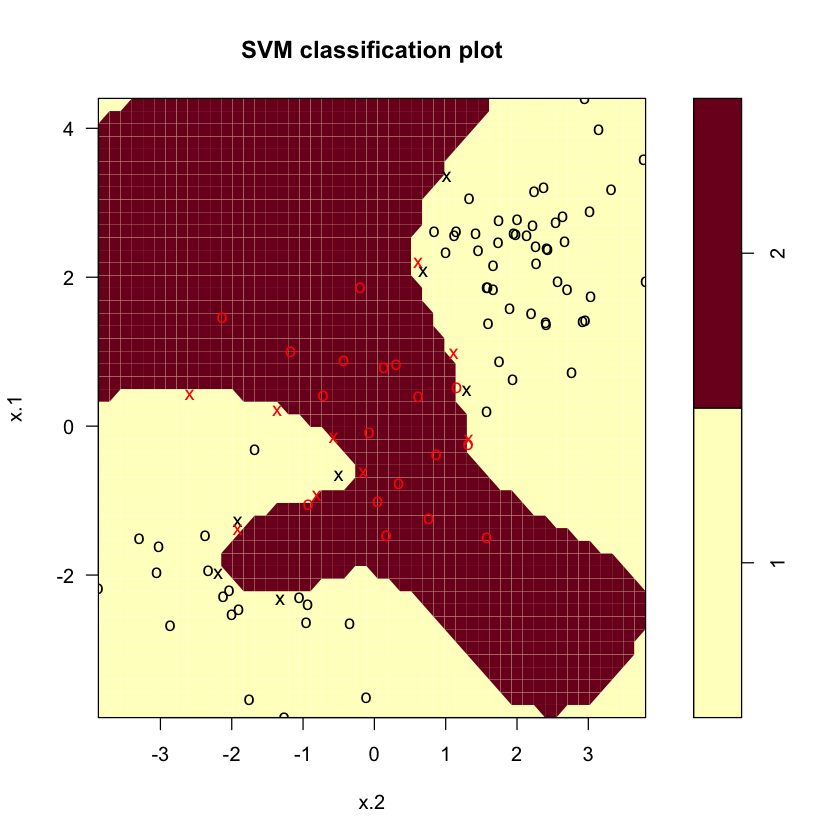

In [5]:
# Support Vector Machine (Non-linear kernel; K = 2) 
## kernel = "polynomial" (degree)
## kernel = "radial" (gamma)
set.seed(1)
x = matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] = x[1:100, ] + 2
x[101:150, ] = x[101:150, ] - 2
y = c(rep(1, 150), rep(2, 50))
data = data.frame(x = x, y = as.factor(y))

ind = sample(1:200, 100)
svm_small_c = svm(y ~., data = data[ind, ], kernel = "radial", gamma = 1, cost = 1)
summary(svm_small_c)            # High-bias + Low-variance: Regular decision boundary with many support vectors   
svm_large_c = svm(y ~., data = data[ind, ], kernel = "radial", gamma = 1, cost = 1e5)
summary(svm_large_c)            # Low-bias + High-variance: Irregular decision boundary with few support vectors   

plot(svm_small_c, data[ind, ])
plot(svm_large_c, data[ind, ])

In [6]:
# Cross validation
set.seed(10)
params = tune(svm, y ~., data = data[ind, ], kernel = "radial",
              ranges = list(cost = c(0.1, 1, 10, 100, 1000), gamma = c(0.5, 1, 2, 3, 4)))
table(prediction = predict(params$best.model, newx = data[-ind, ]), truth = data[-ind, "y"])

          truth
prediction  1  2
         1 55 17
         2 22  6

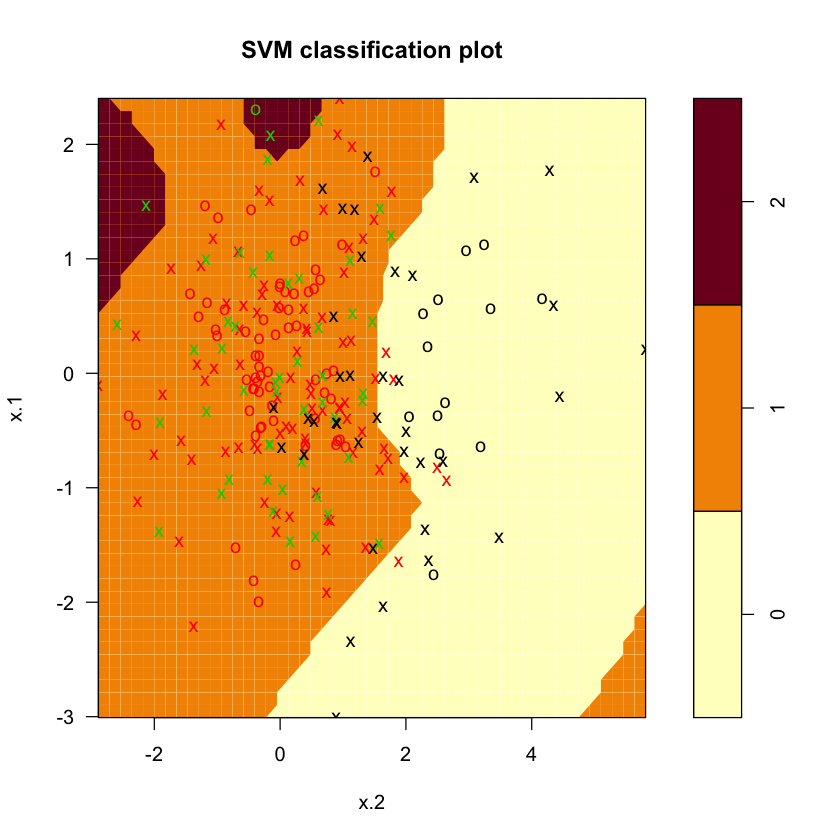

In [7]:
# Support Vector Machine (Non-linear kernel; K > 2)
set.seed(1)
x = matrix(rnorm(200 * 2), ncol = 2)
x = rbind(x, matrix(rnorm(50 * 2), ncol = 2))
y = c(rep(1, 150), rep(2, 50))
y = c(y, rep(0, 50))
x[y == 0, 2] = x[y == 0, 2] + 2
data = data.frame(x = x, y = as.factor(y))

svm_model = svm(y ~., data = data, kernel = "radial", cost = 10, gamma = 1) 
plot(svm_model, data)

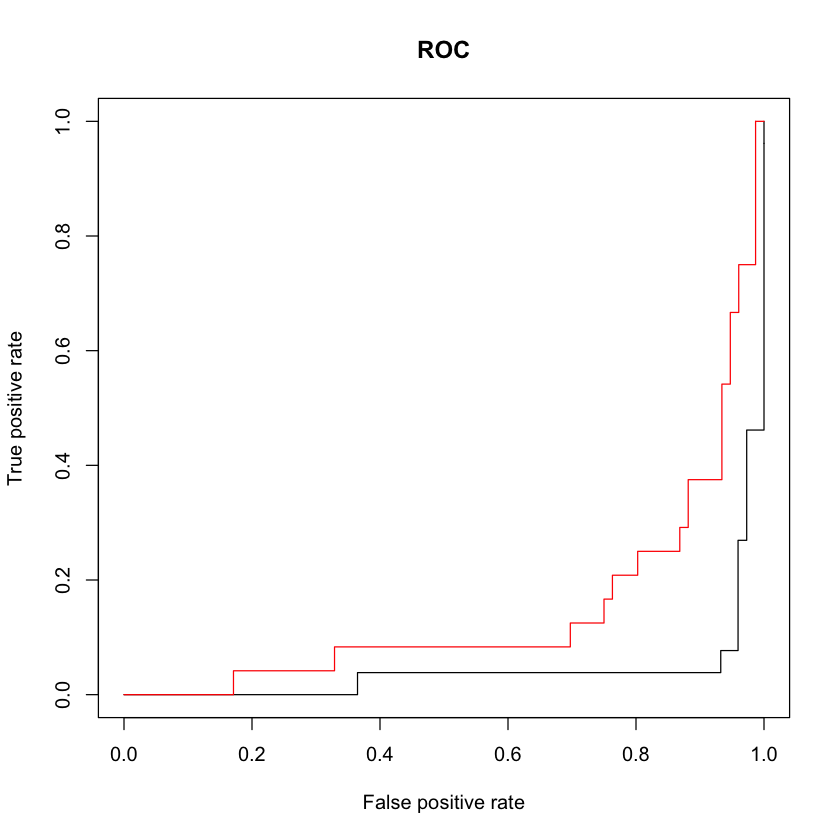

In [20]:
# ROC Curves

# Create plot function
## Transform the input data into a standardized format: prediction(predictions, labels, ...)
## Perform predictor evaluations: performance(prediction.obj, measure, ...)
rocplot = function(pred, label, ...) {
    pred_obj = prediction(pred, label)
    perf = performance(pred_obj, "tpr", "fpr") 
    plot(perf, ...)
}

# Generate sample data 
set.seed(10)
x = matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] = x[1:100, ] + 2
x[101:150, ] = x[101:150, ] - 2
y = c(rep(1, 150), rep(2, 50))
data = data.frame(x = x, y = as.factor(y))

# ROC 
## Class labels
## Fitted values: 
## If the fitted value > 0: The observation is assigned to one class
## If the fitted value < 0: The observation is assigned to the other class
ind = sample(1:200, 100)
svm_model = svm(y ~., data = data[ind, ], kernel = "radial", gamma = 2, cost = 1, decision.values = TRUE)

pred_vals_1 = predict(svm_model, data[ind, ], decision.values = TRUE)   # In-sample preds 
pred_vals_2 = predict(svm_model, data[-ind, ], decision.values = TRUE)  # Out-of-sample preds 

pred_1 = attr(pred_vals_1, which = "decision.values")  # Access the specific attribute values
pred_2 = attr(pred_vals_2, which = "decision.values")  # Access the specific attribute values
rocplot(pred_1, data[ind, "y"], main = "ROC")
rocplot(pred_2, data[-ind, "y"], add = T, col = "red")

In [28]:
# Application: Gene Expression Data
## For each tissue sample, gene expression measurements are available
## Goal: To predict four distinct types of small round blue cell tumors
names(Khan)
print(dim(Khan$xtrain))
print(dim(Khan$xtest))

## Approach: SVM with linear kernel (p >> n)
data = data.frame(x = Khan$xtrain, y = as.factor(Khan$ytrain))
lr_svm = svm(y ~., data = data, kernel = "linear", cost = 10)
summary(lr_svm)

validation_data = data.frame(x = Khan$xtest, y = as.factor(Khan$ytest))
pred_y = predict(lr_svm, newdata = validation_data)
table(pred_y, validation_data$y)

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308
[1]   20 2308



Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




      
pred_y 1 2 3 4
     1 3 0 0 0
     2 0 6 2 0
     3 0 0 4 0
     4 0 0 0 5